In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

from archSpiral import *

c:\Users\Rebecca\anaconda3\envs\MLEnv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(658, 674, 3)


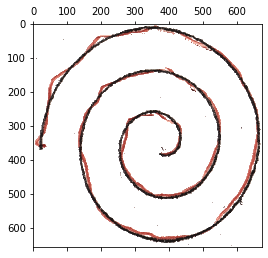

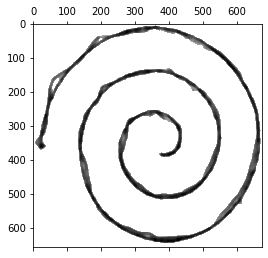

In [22]:
# read in the file
filename = 'sp1-H1.jpg'
file = cv2.imread('C:/Users/Rebecca/Documents/Virginia_Tech/Research/git-repos/hand-tremor-detection/spiral-classifier/datasets/handPD_new/test/healthy/' + filename, 1)
# blur the image
fileBlur = cv2.blur(file, (5,5))
imgBlur = cv2.medianBlur(fileBlur, 11)
rHT = imgBlur[:,:,1]

print(np.shape(file))

origImg = file.copy()
# iterate through all points in the image and threshold
nx = np.shape(origImg)[0]
ny = np.shape(origImg)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = origImg[x][y]
        if ((color[0] > 180) & (color[1] > 180) & (color[2] > 180)): # | (color[0] < 70):
            origImg[x][y][0] = 255
            origImg[x][y][1] = 255
            origImg[x][y][2] = 255

for y in range(ny): # col
    for x in range(nx): # row
        color = rHT[x][y]
        if (color > 180):
            rHT[x][y] = 255
            rHT[x][y] = 255
            rHT[x][y] = 255

plt.matshow(origImg)
plt.matshow(rHT, cmap='gray')

#### extract the template

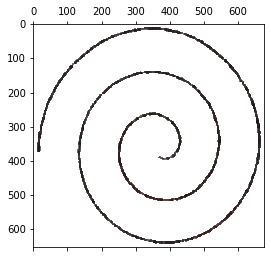

In [8]:
imgST = origImg.copy()

# iterate through all points in the image and threshold
nx = np.shape(imgST)[0]
ny = np.shape(imgST)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = imgST[x][y]
        if ((color[0] < 140) & (color[1] < 140) & (color[2] < 140)):
            imgST[x][y][0] = color[0]
            imgST[x][y][1] = color[1]
            imgST[x][y][2] = color[2]
        else:
            imgST[x][y][0] = 255
            imgST[x][y][1] = 255
            imgST[x][y][2] = 255

# perform erosion and dilation
dilation_size = 1
dilateElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*dilation_size+1,2*dilation_size+1), anchor=(dilation_size,dilation_size))
imgST = cv2.dilate(imgST, dilateElement)
imgST = cv2.dilate(imgST, dilateElement)

erosion_size = 2
erodeElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*erosion_size+1,2*erosion_size+1), anchor=(erosion_size,erosion_size))
imgST = cv2.erode(imgST, erodeElement)

# imgST = cv2.blur(imgST, (10,10))
# imgST = cv2.medianBlur(imgST, 3)

plt.matshow(imgST)
plt.show()

#### extract the hand-trace

<Figure size 720x720 with 0 Axes>

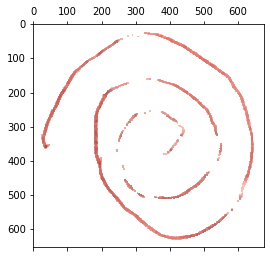

In [9]:
img = origImg.copy()
# iterate through all points in the image and threshold
nx = np.shape(img)[0]
ny = np.shape(img)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = img[x][y]
        if ((color[0] > 200) & (color[1] > 200) & (color[2] > 200)) | (color[0] < 70):
            img[x][y][0] = 255
            img[x][y][1] = 255
            img[x][y][2] = 255
            
# try dilation
# perform erosion and dilation
imgHT = cv2.dilate(img, dilateElement)
imgHT = cv2.dilate(imgHT, dilateElement)
imgHT = cv2.erode(imgHT, dilateElement)
imgHT = cv2.erode(imgHT, dilateElement)
# temp = cv2.dilate(temp, dilateElement)
# temp = cv2.dilate(temp, dilateElement)

plt.figure(figsize=(10,10))
plt.matshow(imgHT)

#### set condition to fill in blank pixels

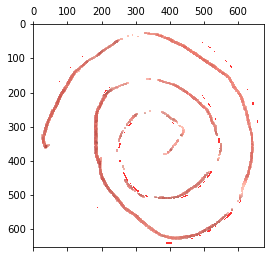

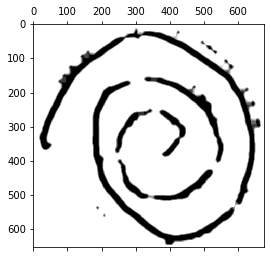

In [12]:
# iterate through all the pixels
# check on the red channel of the origImg
    # if on the red channel the pixels are below 70, then they are overlapping
    # also check if there are no pixels in the HT image
    # if all, then fill in pixels

completeHT = imgHT.copy()

for y in range(ny):
    for x in range(nx):
        if (35 <= rHT[x][y] <= 50) & (imgHT[x][y][2] == 255): # 65, 80 (min = 55 imgHT, min = 35 rHT)
            completeHT[x][y][0] = 255
            completeHT[x][y][1] = 50
            completeHT[x][y][2] = 50

plt.matshow(completeHT)

# completeHT = cv2.dilate(completeHT, dilateElement)
completeHT = cv2.erode(completeHT, erodeElement)
completeHT = cv2.erode(completeHT, erodeElement)
completeHT = cv2.dilate(completeHT, dilateElement)
completeHT = cv2.erode(completeHT, erodeElement)
completeHT = cv2.erode(completeHT, erodeElement)

# convert to grayscale
completeHT = cv2.cvtColor(completeHT, cv2.COLOR_BGR2GRAY)

for y in range(ny):
    for x in range(nx):
        if completeHT[x][y] != 255:
            completeHT[x][y] = 0

cHT_blur = cv2.blur(completeHT, (5,5))
cHT_blur = cv2.medianBlur(cHT_blur, 11)

# completeHT = cv2.erode(cHT_blur, erodeElement)

completeHT = cv2.dilate(cHT_blur, erodeElement)
completeHT = cv2.dilate(completeHT, erodeElement)


plt.matshow(completeHT, cmap='gray')

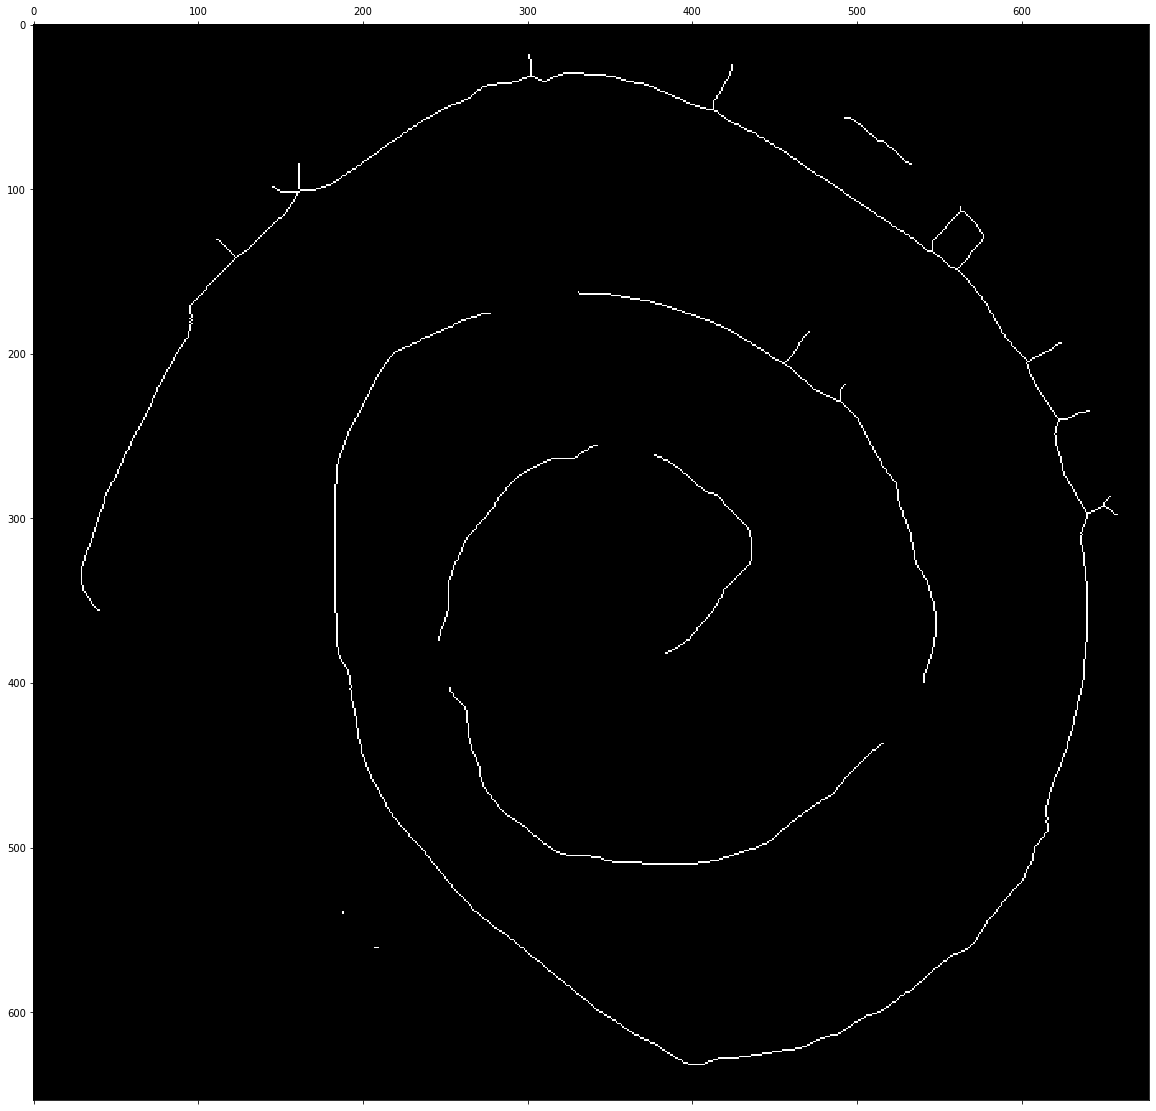

In [13]:
# skeletonize
from skimage.morphology import skeletonize, thin
normImg = completeHT / 255
normImg = 1 - normImg
# skel = skeletonize(normImg) * 255
thinned = thin(normImg, max_num_iter=200) * 255

# plot
plt.figure(figsize=(20,20))
plt.matshow(thinned, cmap='gray', fignum=1)

In [ ]:
from skimage.morphology import skeletonize
# normImg = completeHT / 255
# normImg = 1 - normImg
# skel = skeletonize(normImg) * 255